In [10]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from PIL import Image
import numpy as np
from math import exp
from sklearn.feature_extraction import image

In [1]:
imgPath = "./ImageNet/00001.png"

In [4]:
img = Image.open(imgPath)
data = np.asarray(img)
print(data.shape)

(64, 64, 3)


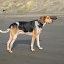

In [5]:
display(img)

In [70]:
data

array([[[199, 192, 148],
        [205, 198, 154],
        [201, 197, 150],
        ...,
        [231, 218, 166],
        [233, 220, 168],
        [231, 215, 163]],

       [[201, 194, 150],
        [206, 199, 155],
        [204, 200, 153],
        ...,
        [231, 218, 166],
        [233, 220, 168],
        [229, 213, 161]],

       [[202, 195, 149],
        [206, 199, 153],
        [206, 199, 153],
        ...,
        [231, 218, 166],
        [229, 216, 164],
        [233, 217, 165]],

       ...,

       [[ 25,  19,   7],
        [ 16,  10,   0],
        [ 20,  16,   5],
        ...,
        [ 54,  63,  42],
        [ 57,  66,  45],
        [ 58,  68,  44]],

       [[ 16,  10,   0],
        [ 20,  14,   2],
        [ 34,  30,  18],
        ...,
        [ 54,  63,  42],
        [ 57,  66,  45],
        [ 55,  65,  41]],

       [[ 26,  20,   6],
        [ 26,  20,   6],
        [ 35,  29,  15],
        ...,
        [ 53,  63,  39],
        [ 51,  61,  37],
        [ 57,  67,  43]]

In [20]:
graph = image.img_to_graph(data[:,:,0])
# 如何保持 3D

In [21]:
graph.shape

(4096, 4096)

In [174]:
def Gaussian(x1, x2, delta=1):
    return exp(-np.dot(x1-x2, x1-x2) / (2*delta**2))

In [184]:
# def similarity(dataset):
#     S = np.empty(shape=(dataset.shape[0], dataset.shape[0]), dtype="float16")
#     for i in range(dataset.shape[0]):
#         for j in range(dataset.shape[0]):
#             S[i][j] = Gaussian(dataset[i], dataset[j])
#     return S
# 遇到的问题：
# 1、相似度超过 1 了，按道理不该的
# > 因为 np.dot(dataset[0]-dataset[1], dataset[0]-dataset[1])的结果溢出
# > 解决办法：溢出的话，结果为负，也就是高斯相似度超过 1，令超过 1 的为 0，作为近似

In [176]:
dataset[0]-dataset[1]

array([ -7, -10,  -7], dtype=int8)

In [177]:
np.dot(dataset[0]-dataset[1], dataset[0]-dataset[1])

-58

In [185]:
S = similarity(dataset)

In [186]:
S[S > 1] = 0

In [187]:
S

array([[1.000e+00, 0.000e+00, 8.209e-02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 1.371e-06, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.209e-02, 1.371e-06, 1.000e+00, ..., 6.737e-03, 0.000e+00,
        3.755e-06],
       ...,
       [0.000e+00, 0.000e+00, 6.737e-03, ..., 1.000e+00, 1.111e-02,
        2.035e-04],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.111e-02, 1.000e+00,
        3.679e-01],
       [0.000e+00, 0.000e+00, 3.755e-06, ..., 2.035e-04, 3.679e-01,
        1.000e+00]], dtype=float16)

In [ ]:
cluster = SpectralClustering(n_clusters=2, , affinity='precomputed').fit_predict(S)

In [ ]:
# # 分块
# height = 10
# width = 13
# col_num = data.shape[1] // width
# row_num = data.shape[0] // height
# block = np.empty(shape=(col_num*row_num, height*width, 3), dtype="int8")
# for i in range(row_num):
#     for j in range(col_num):
#         block[i*col_num+j] = data[i*height:i*height+height,j*width:j*width+width].reshape(height*width, 3)




In [128]:
block.shape

(1184, 130, 3)

原本应该是：321\*481=154401 --> 相似矩阵S：154401\*154401

分块后：每个块10\*13=130，但是整体仍然是：1184\*130=153920≈154401

在计算相似图上，分块作用不大

In [129]:
S = np.empty(shape=(block.shape[0], block.shape[1], block.shape[1]), dtype="float16")
print(S.shape)

(1184, 130, 130)


In [137]:
# def similarity(S, block):
#     for k in range(S.shape[0]):
#         for i in range(S.shape[1]):
#             for j in range(S.shape[1]):
#                 S[k][i][j] = Gaussian(block[k][i], block[k][j])
# 遇到的问题：
# 1、复杂度太高
# 2、RGB差值uint8溢出：block转为int8类型
# def similarity(S, block):
#     for k in range(S.shape[0]):
#         for i in range(S.shape[1]):
#             for j in range(S.shape[1]):def Gaussian(x1, x2, delta=1):
    return exp(-np.dot(x1-x2, x1-x2) / (2*delta**2))
#                 S[k][i][j] = np.dot(block[0][0] - block[0][1], block[0][0] - block[0][1])
#     S = exp(-S/2)
# 遇到的问题：
# 1、复杂度仍然太高
# 2、S = exp(-S/2) 不可行

计算相似图的复杂度 O(n^2)

计算特征向量是O(n^3)，分块后是O(w\*h\*(n^3/(w\*h)^3))=O(n^3/(w\*h)^2)，仍然还是比较高

In [138]:
similarity(S, block)

TypeError: only size-1 arrays can be converted to Python scalars

In [170]:
np.dot([1,2],[2,3])

8

In [112]:
S

array([[[ 1., inf, inf, ..., inf, inf, inf],
        [inf,  1., inf, ..., inf, inf, inf],
        [inf, inf,  1., ..., inf, inf, inf],
        ...,
        [inf, inf, inf, ...,  1., inf, inf],
        [inf, inf, inf, ..., inf,  1., inf],
        [inf, inf, inf, ..., inf, inf,  1.]],

       [[ 1., inf, inf, ..., inf, inf, inf],
        [inf,  1., inf, ..., inf, inf, inf],
        [inf, inf,  1., ..., inf, inf, inf],
        ...,
        [inf, inf, inf, ...,  1., inf,  1.],
        [inf, inf, inf, ..., inf,  1., inf],
        [inf, inf, inf, ...,  1., inf,  1.]],

       [[ 1., inf, inf, ..., inf, inf, inf],
        [inf,  1., inf, ..., inf, inf, inf],
        [inf, inf,  1., ..., inf, inf, inf],
        ...,
        [inf, inf, inf, ...,  1.,  1., inf],
        [inf, inf, inf, ...,  1.,  1., inf],
        [inf, inf, inf, ..., inf, inf,  1.]],

       ...,

       [[ 1., inf, inf, ..., inf, inf, inf],
        [inf,  1., inf, ..., inf, inf, inf],
        [inf, inf,  1., ..., inf, inf, inf

In [136]:
np.dot(block[0][0] - block[0][1], block[0][0] - block[0][1])

108

In [132]:
block[0][1]

array([ -51,  -58, -102], dtype=int8)

In [131]:
block[0][0]

array([ -57,  -64, -108], dtype=int8)

In [43]:
d

array([[163, 153, 128],
       [163, 153, 128],
       [164, 157, 131],
       ...,
       [ 46,  95, 100],
       [ 42,  89,  95],
       [ 46,  93,  99]], dtype=uint8)

In [55]:
type(data[0][0][0])

numpy.uint8

In [98]:
block[:] = block[:].reshape(height*width, 3)

ValueError: cannot reshape array of size 461760 into shape (130,3)

In [94]:
del flatten_data

In [75]:
data[0:height,0:width].shape

(10, 13, 3)

In [78]:
data[0:height][0:width].shape

(10, 481, 3)

(1200, 1920)

(1200, 1920, 3)


In [44]:
data

array([[[163, 153, 128],
        [163, 153, 128],
        [164, 157, 131],
        ...,
        [116, 141, 120],
        [117, 145, 123],
        [117, 145, 123]],

       [[156, 146, 121],
        [161, 151, 126],
        [161, 154, 128],
        ...,
        [116, 141, 120],
        [119, 144, 123],
        [116, 144, 122]],

       [[159, 149, 124],
        [161, 151, 126],
        [162, 155, 129],
        ...,
        [116, 141, 120],
        [118, 143, 122],
        [117, 142, 121]],

       ...,

       [[ 66, 115, 112],
        [ 61, 110, 107],
        [ 53, 103, 102],
        ...,
        [ 34,  92,  96],
        [ 36,  93, 100],
        [ 44, 102, 106]],

       [[ 68, 114, 112],
        [ 62, 111, 108],
        [ 56, 106, 105],
        ...,
        [ 41,  92,  96],
        [ 39,  89,  96],
        [ 44,  95,  99]],

       [[ 57, 103, 101],
        [ 52, 101,  98],
        [ 54, 102, 104],
        ...,
        [ 46,  95, 100],
        [ 42,  89,  95],
        [ 46,  93,  99]]